# 06e plotting sexual dimorphism

done with this docker image:

docker run \
--rm \
-d \
--name scanpy2 \
-p 8880:8888 \
-e JUPYTER_ENABLE_LAB=YES \
-v /Users/efast/Documents/:/home/jovyan/work \
scanpy:1.4.6


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import scipy.stats as stats
from helper_functions import *
import seaborn as sns

from upsetplot import UpSet
import re
import scanpy as sc

In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save=300, vector_friendly=True)
# plt.rcParams['figure.figsize']=(5,5) #rescale figures

## 1) Steady state differences

In [3]:
path_name_start = './write/MAST_female_' 
path_name_end = '_LT.csv'

LT_old = pd.read_csv(path_name_start + 'old' + path_name_end)
LT_new = pd.read_csv(path_name_start + 'new' + path_name_end)

LT_old = LT_old.set_index('primerid')
LT_new = LT_new .set_index('primerid')

LT_old.drop(columns=['Unnamed: 0'])
LT_new.drop(columns=['Unnamed: 0'])

merge_df = pd.merge(LT_old, LT_new, left_index=True, right_index=True, how='inner', 
                    suffixes=('_old', '_new'))

In [4]:
merge_df

Unnamed: 0_old  Pr(>Chisq)_old  coef_old       FDR_old  \
primerid                                                           
Xist                   1    0.000000e+00       NaN  0.000000e+00   
Eif2s3y                2    7.493909e-87 -0.336286  2.883282e-83   
Ddx3y                  3    2.523067e-63 -0.227151  6.471666e-60   
Myl10                  4    3.908762e-58  0.553674  7.519481e-55   
Tsix                   5    2.928894e-39  0.199140  4.507569e-36   
Kdm5d                  6    5.138452e-24 -0.103938  6.590065e-21   
Dnaja1                 8    4.074407e-14 -0.244080  3.919070e-11   
Jun                    9    2.909216e-11 -0.332313  2.487379e-08   
Ctla2a                12    1.010259e-09 -0.259193  6.478285e-07   
Egr1                  14    4.111705e-08 -0.157947  2.259969e-05   
Junb                  15    6.891376e-08 -0.215226  3.535276e-05   
Gmfg                  16    1.420021e-07  0.199989  6.427681e-05   
Eif1                  20    4.300415e-06 -0.081032  1.654585e-03   
Ddx3x                 22    6.610614e-06  0.110754  2.312212e-03   
Dynll1                24    1.219520e-05 -0.143630  3.910085e-03   
Ftl1                  25    1.655656e-05 -0.075431  5.096109e-03   

          Unnamed: 0_new  Pr(>Chisq)_new  coef_new        FDR_new  
primerid                                                           
Xist                   2    0.000000e+00       NaN   0.000000e+00  
Eif2s3y                1    0.000000e+00 -0.439765   0.000000e+00  
Ddx3y                  4   9.818736e-248 -0.276641  2.267146e-244  
Myl10                  3   6.766723e-319  0.802587  2.083248e-315  
Tsix                  12    1.859983e-40  0.088972   1.431567e-37  
Kdm5d                  7    4.616824e-90 -0.122912   6.091569e-87  
Dnaja1               184    2.887881e-05  0.077987   1.449591e-03  
Jun                   35    4.646807e-18  0.215932   1.226226e-15  
Ctla2a                93    2.120913e-08  0.157341   2.106318e-06  
Egr1                  28    1.246070e-19 -0.251563   4.110252e-17  
Junb                 204    5.956715e-05 -0.121452   2.696873e-03  
Gmfg                  21    2.416235e-25  0.207984   1.048637e-22  
Eif1                 139    2.257605e-06  0.044089   1.500089e-04  
Ddx3x                 32    2.329283e-18  0.145569   6.722892e-16  
Dynll1                30    3.653013e-19  0.163230   1.124641e-16  
Ftl1                 112    3.018056e-07 -0.052628   2.488818e-05

In [5]:
consistent = merge_df[((merge_df['coef_old'] > 0) & (merge_df['coef_new'] > 0)) | ((merge_df['coef_old'] < 0) & (merge_df['coef_new'] < 0))].index.tolist()

In [6]:
consistent

['Eif2s3y',
 'Ddx3y',
 'Myl10',
 'Tsix',
 'Kdm5d',
 'Egr1',
 'Junb',
 'Gmfg',
 'Ddx3x',
 'Ftl1']

In [7]:
consistent = ['Xist',
 'Tsix',
 'Ddx3x',
 'Myl10',
 'Gmfg',
 'Eif2s3y',
 'Ddx3y',          
 'Kdm5d',
 'Egr1',
 'Junb',
 'Ftl1']

In [8]:
adata_old = sc.read(
    './sc_objects/old_LT_preprocessed.h5ad')
adata_new = sc.read(
    './sc_objects/new_ct_LT_preprocessed.h5ad')

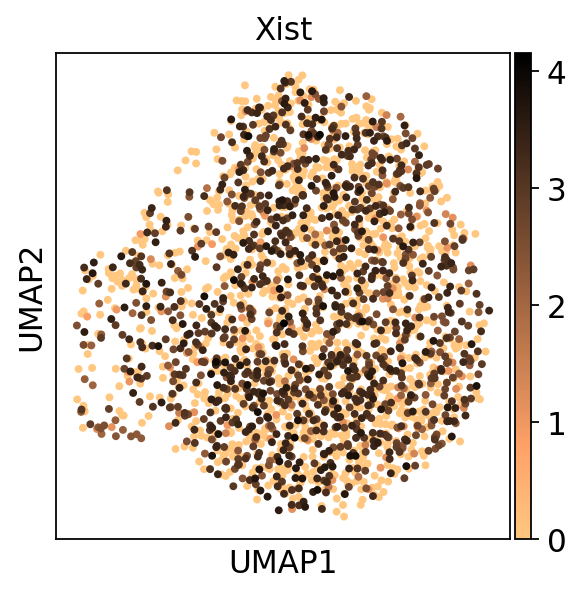

In [9]:
sc.pl.umap(adata_old, color = ['Xist'], use_raw = True, cmap = 'copper_r', save='_LT_old_Xist.pdf')

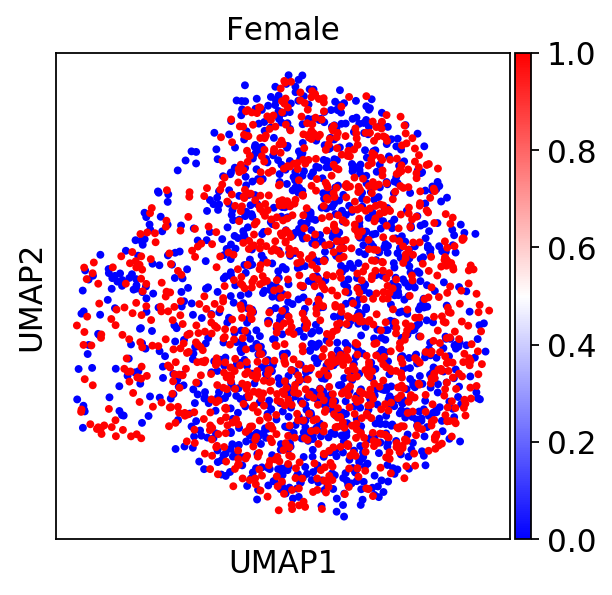

In [10]:
sc.pl.umap(adata_old, color = ['Female'], use_raw = True, cmap = 'bwr', save='_LT_old_Female_cat.pdf')

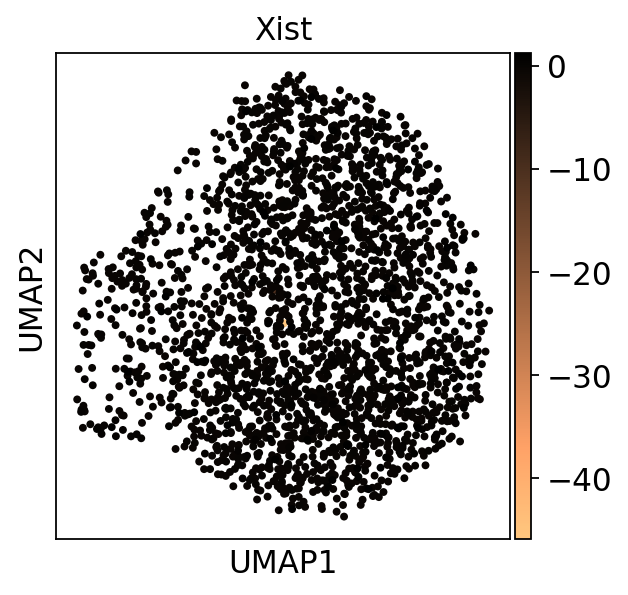

In [11]:
sc.pl.umap(adata_old, color = 'Xist', use_raw = False, cmap = 'copper_r', save='_LT_old_Xist_regressed.pdf')

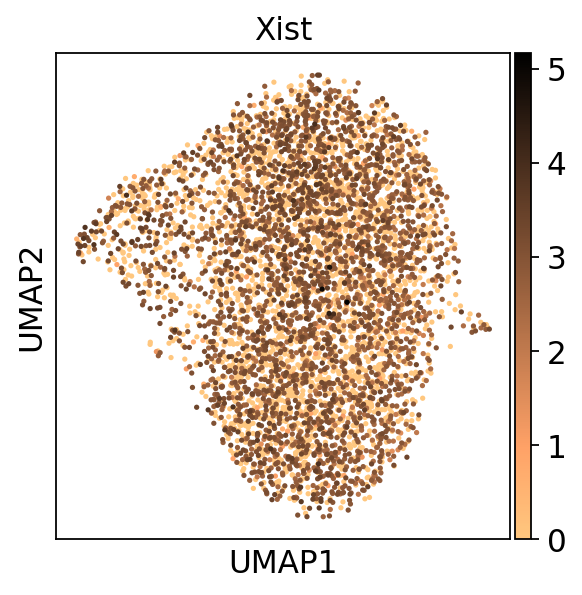

In [12]:
sc.pl.umap(adata_new, color = ['Xist'], use_raw = True, cmap = 'copper_r', save='_LT_new_Xist.pdf')

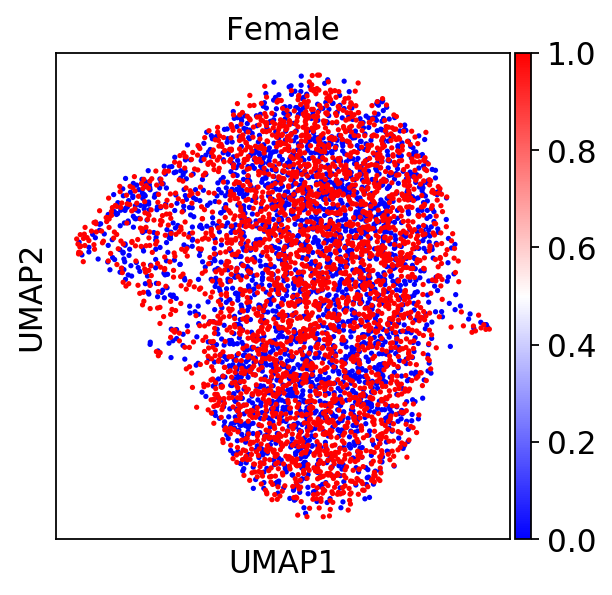

In [13]:
sc.pl.umap(adata_new, color = ['Female'], use_raw = True, cmap = 'bwr', save='_LT_new_Female_cat.pdf')

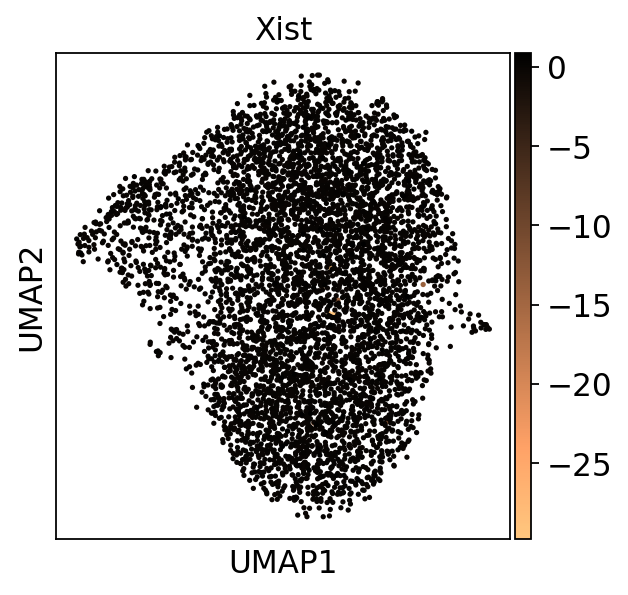

In [14]:
sc.pl.umap(adata_new, color = 'Xist', use_raw = False, cmap = 'copper_r', save='_LT_new_Xist_regressed.pdf')

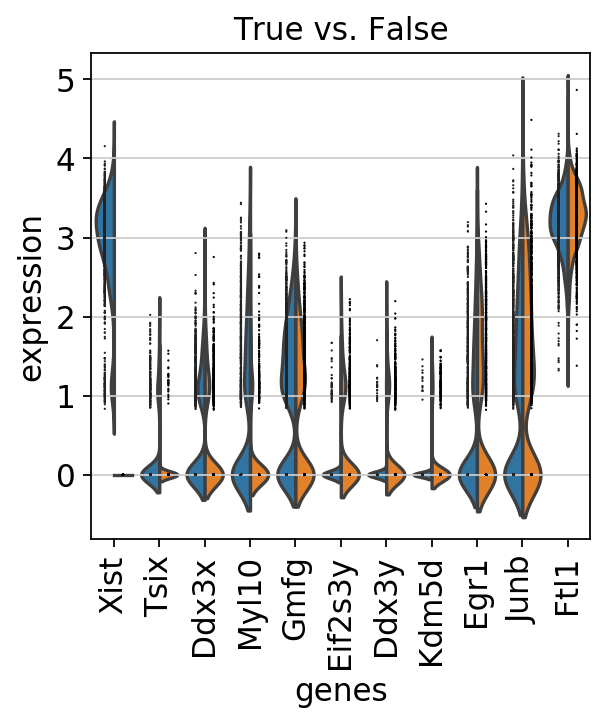

In [15]:
sc.tl.rank_genes_groups(adata_old, 'Female_cat', groups = ['True'], reference = 'False', use_raw = True)
sc.pl.rank_genes_groups_violin(adata_old, groups=['True'],
                               gene_names=consistent, jitter = False)

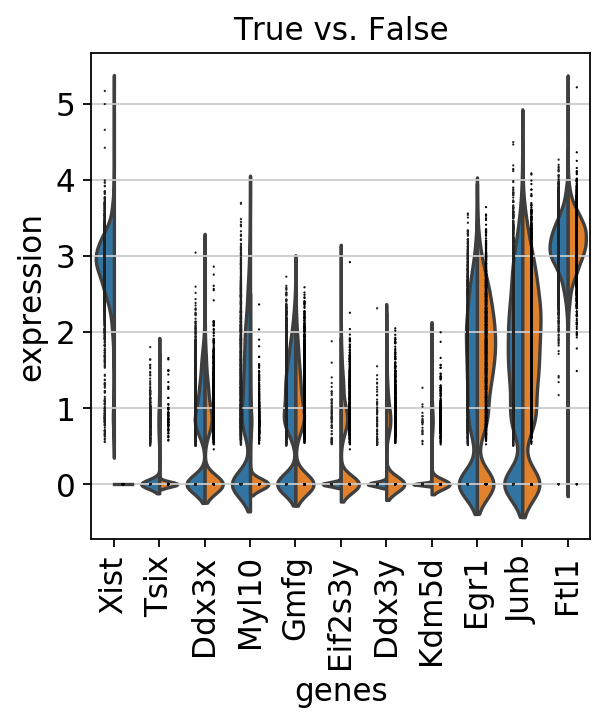

In [16]:
sc.tl.rank_genes_groups(adata_new, 'Female_cat', groups = ['True'], reference = 'False', use_raw = True)
sc.pl.rank_genes_groups_violin(adata_new, groups=['True'],
                               gene_names=consistent, jitter = False)

In [17]:
color = ['red','red','red','red','red', 'blue','blue','blue','blue','blue','blue']

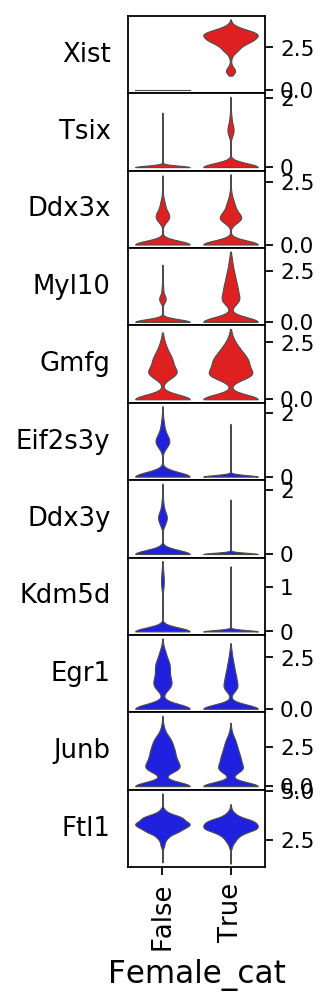

In [18]:
sc.pl.stacked_violin(adata_old[(adata_old.obs['Female_cat']=='True') |
                           (adata_old.obs['Female_cat']=='False') 
                           ],
                         consistent, figsize=(1.2,7), log=False, swap_axes=True, 
                         save='_LT_old_sex_dimorphism.pdf', color = color, groupby='Female_cat')

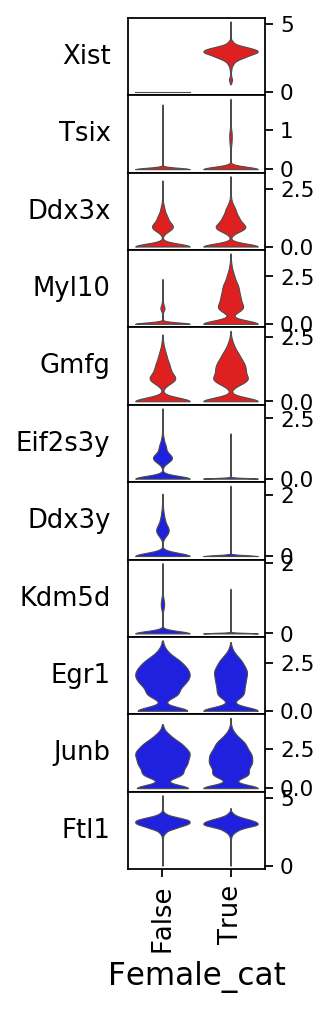

In [19]:
sc.pl.stacked_violin(adata_new[(adata_new.obs['Female_cat']=='True') |
                           (adata_new.obs['Female_cat']=='False') 
                           ],
                         consistent, figsize=(1.2,7), log=False, swap_axes=True, 
                         color = color, save='_LT_new_sex_dimorphism.pdf', groupby='Female_cat')

## 2) Difference in proportions between treatments LT

In [20]:
adata_old = None
adata_new = None

adata = sc.read('./sc_objects/LT_preprocessed.h5ad')

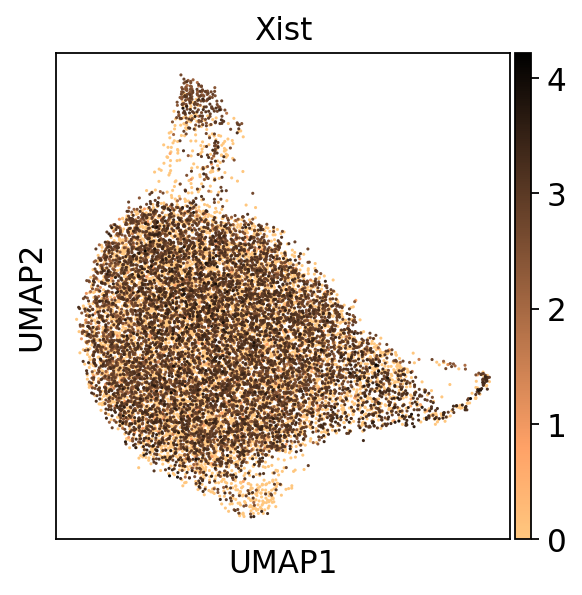

In [21]:
sc.pl.umap(adata, color = ['Xist'], use_raw = True, cmap = 'copper_r', save='_LT_Xist.pdf')

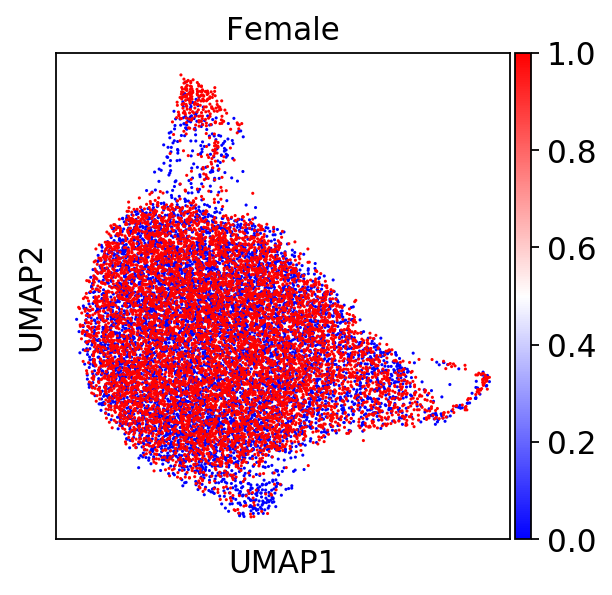

In [22]:
sc.pl.umap(adata, color = ['Female'], use_raw = True, cmap = 'bwr', save='_LT_Female_cat.pdf')

In [23]:
color = ['red', 'blue']

Trying to set attribute `.uns` of view, copying.


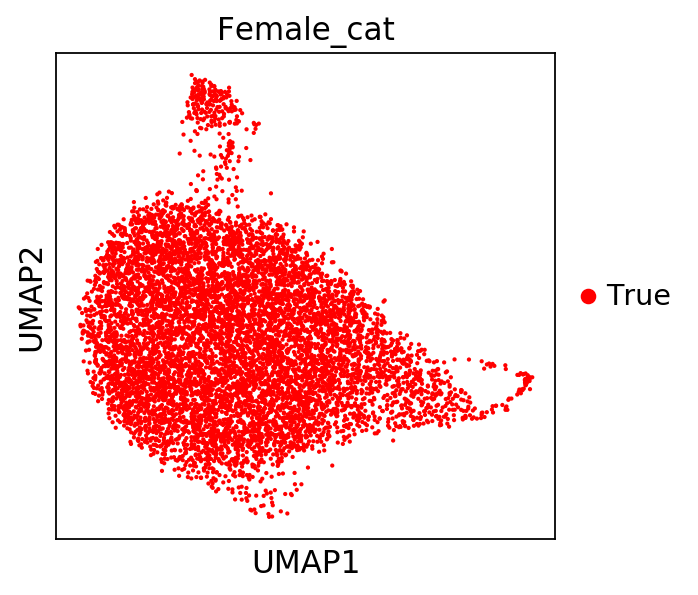

In [24]:
sc.pl.umap(adata[adata.obs['Female_cat']=='True'], color = ['Female_cat'], use_raw = True, palette = color, save='_LT_Female_only.pdf')

In [25]:
color = ['blue', 'red']

Trying to set attribute `.uns` of view, copying.


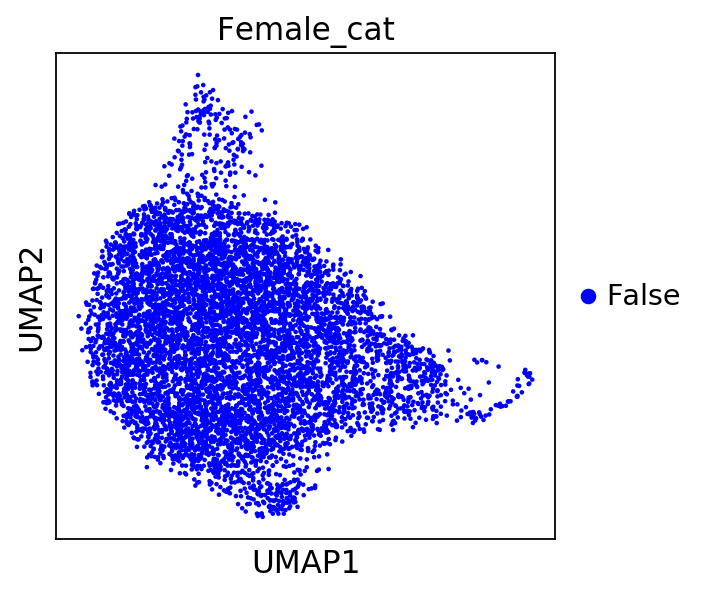

In [26]:
sc.pl.umap(adata[adata.obs['Female_cat']=='False'], color = ['Female_cat'], use_raw = True, palette = color, save='_LT_male_only.pdf')

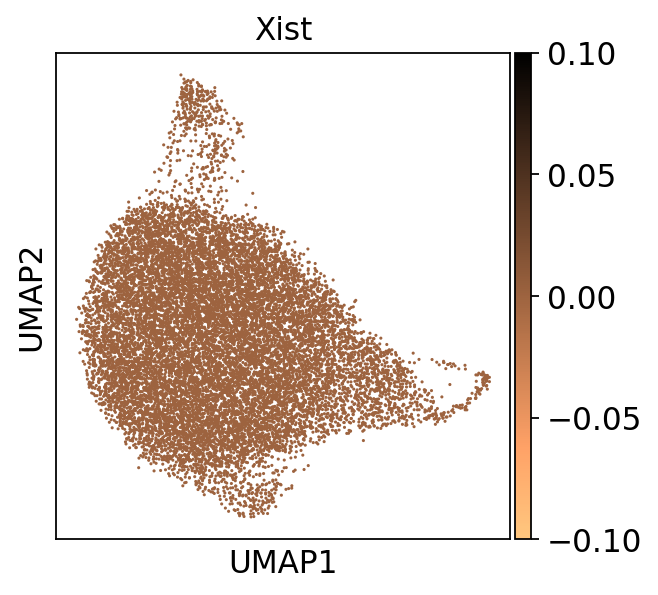

In [27]:
sc.pl.umap(adata, color = 'Xist', use_raw = False, cmap = 'copper_r', save='_LT_Xist_regressed.pdf')

In [28]:
# rename cluster categories
adata.rename_categories('leiden', ['Metabolism', 'Quiescent', 'Activated', 'Interferon', 'Acute-Activation', 'Cell-cycle'])

In [29]:
adata.uns['leiden_colors'] = ['#279e68', '#1f77b4', '#ff7f0e', '#aa40fc', '#d62728', '#8c564b', '#e377c2']

In [30]:
sns.set_style("white")

In [31]:
abs_m = pd.pivot_table(adata.obs[adata.obs['Female']==False], values='sex_sample', index=['leiden'],columns=['sample'], aggfunc=[len])
abs_f = pd.pivot_table(adata.obs[adata.obs['Female']==True], values='sex_sample', index=['leiden'],columns=['sample'], aggfunc=[len])

abs_v = pd.merge(abs_f, abs_m, left_index=True, right_index=True, how='inner', suffixes=('_female', '_male'))
abs_v = abs_v.fillna(0) #replaces all NaNs with 0
abs_v.columns = abs_v.columns.droplevel(0) # drops columnlevel (=len)
abs_v.columns = ['GCSF_f', 'ct_f', 'dmPGE2_f', 'indo_f', 'pIC_f', 'GCSF_m', 'ct_m', 'dmPGE2_m', 'indo_m', 'pIC_m']
abs_v.to_csv('./write/LT_cell_numbers_sex.csv', index=True, header=True)
abs_v

GCSF_f    ct_f  dmPGE2_f  indo_f  pIC_f  GCSF_m   ct_m  \
leiden                                                                     
Metabolism         804.0  1051.0       6.0   853.0  106.0   400.0  814.0   
Quiescent          625.0  1079.0       7.0   830.0  102.0   312.0  902.0   
Activated          502.0   915.0      19.0   931.0   25.0   278.0  641.0   
Interferon          15.0    20.0       0.0    31.0  196.0     6.0   20.0   
Acute-Activation     0.0     0.0      62.0     0.0    0.0     0.0    0.0   
Cell-cycle          30.0    50.0       0.0    20.0    1.0    12.0   29.0   

                  dmPGE2_m  indo_m  pIC_m  
leiden                                     
Metabolism            77.0   904.0   82.0  
Quiescent             17.0   986.0   82.0  
Activated             89.0  1016.0   33.0  
Interferon             0.0    27.0  120.0  
Acute-Activation     199.0     1.0    0.0  
Cell-cycle             0.0    27.0    1.0

In [32]:
percent_abs_v = abs_v.iloc[:,0:10].div(abs_v.sum(axis=0), axis=1)
percent_abs_v

GCSF_f      ct_f  dmPGE2_f    indo_f     pIC_f    GCSF_m  \
leiden                                                                         
Metabolism        0.406883  0.337400  0.063830  0.320075  0.246512  0.396825   
Quiescent         0.316296  0.346388  0.074468  0.311445  0.237209  0.309524   
Activated         0.254049  0.293740  0.202128  0.349343  0.058140  0.275794   
Interferon        0.007591  0.006421  0.000000  0.011632  0.455814  0.005952   
Acute-Activation  0.000000  0.000000  0.659574  0.000000  0.000000  0.000000   
Cell-cycle        0.015182  0.016051  0.000000  0.007505  0.002326  0.011905   

                      ct_m  dmPGE2_m    indo_m     pIC_m  
leiden                                                    
Metabolism        0.338321  0.201571  0.305302  0.257862  
Quiescent         0.374896  0.044503  0.332996  0.257862  
Activated         0.266417  0.232984  0.343127  0.103774  
Interferon        0.008313  0.000000  0.009119  0.377358  
Acute-Activation  0.000000  0.520942  0.000338  0.000000  
Cell-cycle        0.012053  0.000000  0.009119  0.003145

In [33]:
percent_abs_v = percent_abs_v.reindex(['Quiescent','Activated','Metabolism', 'Cell-cycle', 
                                     'Interferon','Acute-Activation'])
def_colors = ['#1f77b4', '#ff7f0e', '#279e68', '#8c564b', '#aa40fc', '#d62728', ]

In [34]:
percent_abs_v.columns

Index(['GCSF_f', 'ct_f', 'dmPGE2_f', 'indo_f', 'pIC_f', 'GCSF_m', 'ct_m',
       'dmPGE2_m', 'indo_m', 'pIC_m'],
      dtype='object')

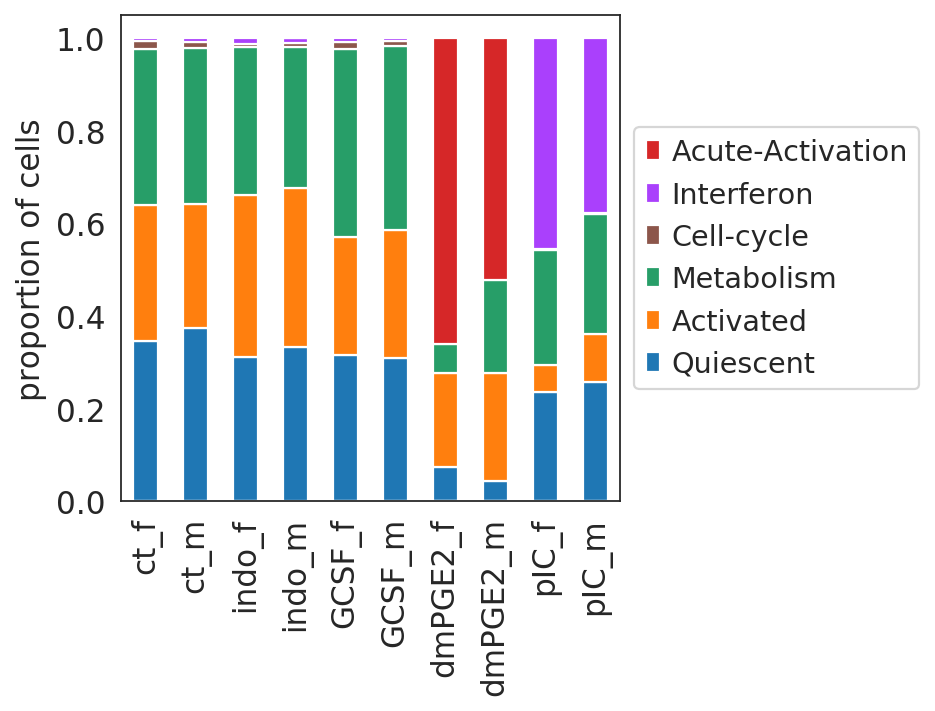

In [35]:
ax = percent_abs_v.T.loc[['ct_f', 'ct_m', 'indo_f', 'indo_m', 'GCSF_f', 'GCSF_m',  
        'dmPGE2_f', 'dmPGE2_m', 'pIC_f','pIC_m']].plot.bar(stacked=True, color = def_colors)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("proportion of cells")
#plt.grid(b=None) # turns off gridline
plt.savefig('./figures/LT_leiden_within_treatment_sex.pdf', bbox_inches = "tight")

In [36]:
abs_v_c = pd.pivot_table(adata.obs[adata.obs['Female']==True], values='sex_sample', index=['sample'],columns=['leiden'], aggfunc=[len])
abs_v_c = abs_v_c.fillna(0) #replaces all NaNs with 0
abs_v_c.columns = abs_v_c.columns.droplevel(0) # drops columnlevel (=len)
abs_v_c

leiden  Metabolism  Quiescent  Activated  Interferon  Acute-Activation  \
sample                                                                   
GCSF         804.0      625.0      502.0        15.0               0.0   
ct          1051.0     1079.0      915.0        20.0               0.0   
dmPGE2         6.0        7.0       19.0         0.0              62.0   
indo         853.0      830.0      931.0        31.0               0.0   
pIC          106.0      102.0       25.0       196.0               0.0   

leiden  Cell-cycle  
sample              
GCSF          30.0  
ct            50.0  
dmPGE2         0.0  
indo          20.0  
pIC            1.0

In [37]:
abs_v_c_norm = abs_v_c.iloc[0:5,:].div(abs_v_c.sum(axis=1), axis=0) #normalize for cell numbers
abs_v_c_norm_f = abs_v_c_norm.iloc[:,0:6].div(abs_v_c_norm.sum(axis=0), axis=1)
abs_v_c_norm_f

leiden  Metabolism  Quiescent  Activated  Interferon  Acute-Activation  \
sample                                                                   
GCSF      0.295979   0.245990   0.219500    0.015767               0.0   
ct        0.245435   0.269394   0.253793    0.013336               0.0   
dmPGE2    0.046432   0.057915   0.174640    0.000000               1.0   
indo      0.232833   0.242217   0.301835    0.024161               0.0   
pIC       0.179320   0.184483   0.050233    0.946737               0.0   

leiden  Cell-cycle  
sample              
GCSF      0.369722  
ct        0.390888  
dmPGE2    0.000000  
indo      0.182757  
pIC       0.056633

In [38]:
abs_v_c = pd.pivot_table(adata.obs[adata.obs['Female']==False], values='sex_sample', index=['sample'],columns=['leiden'], aggfunc=[len])
abs_v_c = abs_v_c.fillna(0) #replaces all NaNs with 0
abs_v_c.columns = abs_v_c.columns.droplevel(0) # drops columnlevel (=len)
abs_v_c

leiden  Metabolism  Quiescent  Activated  Interferon  Acute-Activation  \
sample                                                                   
GCSF         400.0      312.0      278.0         6.0               0.0   
ct           814.0      902.0      641.0        20.0               0.0   
dmPGE2        77.0       17.0       89.0         0.0             199.0   
indo         904.0      986.0     1016.0        27.0               1.0   
pIC           82.0       82.0       33.0       120.0               0.0   

leiden  Cell-cycle  
sample              
GCSF          12.0  
ct            29.0  
dmPGE2         0.0  
indo          27.0  
pIC            1.0

In [39]:
abs_v_c_norm = abs_v_c.iloc[0:5,:].div(abs_v_c.sum(axis=1), axis=0) #normalize for cell numbers
abs_v_c_norm_m = abs_v_c_norm.iloc[:,0:6].div(abs_v_c_norm.sum(axis=0), axis=1)
abs_v_c_norm_m

leiden  Metabolism  Quiescent  Activated  Interferon  Acute-Activation  \
sample                                                                   
GCSF      0.264571   0.234527   0.225673    0.014853          0.000000   
ct        0.225565   0.284060   0.218000    0.020743          0.000000   
dmPGE2    0.134391   0.033720   0.190643    0.000000          0.999352   
indo      0.203551   0.252311   0.280769    0.022754          0.000648   
pIC       0.171921   0.195382   0.084914    0.941650          0.000000   

leiden  Cell-cycle  
sample              
GCSF      0.328669  
ct        0.332767  
dmPGE2    0.000000  
indo      0.251746  
pIC       0.086818

In [40]:
abs_v_c_norm = pd.merge(abs_v_c_norm_m, abs_v_c_norm_f, left_index=True, right_index=True, how='inner', suffixes=('_male', '_female'))
abs_v_c_norm = abs_v_c_norm.fillna(0) #replaces all NaNs with 0
#abs_v_c.columns = abs_v_c.columns.droplevel(0) # drops columnlevel (=len)
abs_v_c_norm.columns = ['Metabolism_m', 'Quiescent_m', 'Activated_m', 'Interferon_m',
       'Acute-Activation_m', 'Cell-cycle_m', 'Metabolism_f', 'Quiescent_f',
       'Activated_f', 'Interferon_f', 'Acute-Activation_f', 'Cell-cycle_f']
abs_v_c_norm

Metabolism_m  Quiescent_m  Activated_m  Interferon_m  \
sample                                                         
GCSF        0.264571     0.234527     0.225673      0.014853   
ct          0.225565     0.284060     0.218000      0.020743   
dmPGE2      0.134391     0.033720     0.190643      0.000000   
indo        0.203551     0.252311     0.280769      0.022754   
pIC         0.171921     0.195382     0.084914      0.941650   

        Acute-Activation_m  Cell-cycle_m  Metabolism_f  Quiescent_f  \
sample                                                                
GCSF              0.000000      0.328669      0.295979     0.245990   
ct                0.000000      0.332767      0.245435     0.269394   
dmPGE2            0.999352      0.000000      0.046432     0.057915   
indo              0.000648      0.251746      0.232833     0.242217   
pIC               0.000000      0.086818      0.179320     0.184483   

        Activated_f  Interferon_f  Acute-Activation_f  Cell-cycle_f  
sample                                                               
GCSF       0.219500      0.015767                 0.0      0.369722  
ct         0.253793      0.013336                 0.0      0.390888  
dmPGE2     0.174640      0.000000                 1.0      0.000000  
indo       0.301835      0.024161                 0.0      0.182757  
pIC        0.050233      0.946737                 0.0      0.056633

In [41]:
# define some colors to identify samples

def_color = ['#A6ACAF', '#2E86C1', '#28B463', '#EC7063', '#884EA0' ]

#https://htmlcolorcodes.com/color-chart/

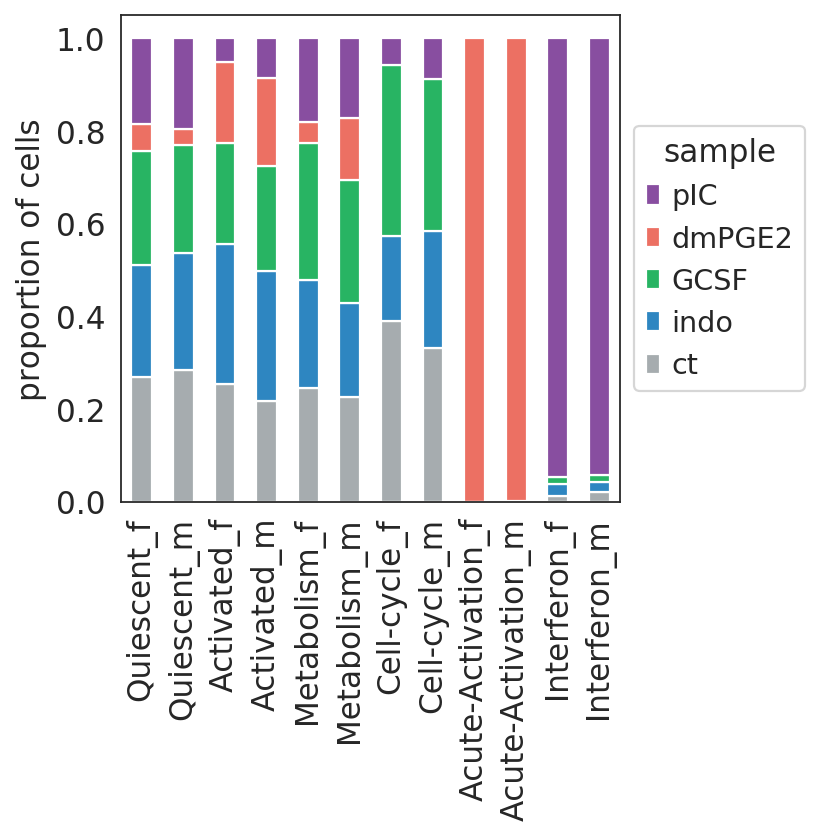

In [42]:
ax = abs_v_c_norm.loc[['ct', 'indo', 'GCSF', 'dmPGE2', 'pIC']].T.loc[['Quiescent_f','Quiescent_m','Activated_f', 'Activated_m', 
                                                                     'Metabolism_f', 'Metabolism_m', 'Cell-cycle_f', 'Cell-cycle_m','Acute-Activation_f', 'Acute-Activation_m',
                                                                      'Interferon_f','Interferon_m'  
                                                                       ]].plot.bar(stacked=True, color = def_color)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='sample', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("proportion of cells")
#plt.grid(b=None) # turns off gridlines
plt.savefig('./figures/LT_treatment_within_leiden_sex.pdf', bbox_inches = "tight")

## 3) Difference in proportions between treatments MPP

In [43]:
adata = None

adata = sc.read(
    './sc_objects/MPP_preprocessed.h5ad')

In [44]:
# rename cluster categories
adata.rename_categories('leiden', ['Primed', 'Metabolism', 'Progenitor', 'Cell-cycle', 'Acute-Activation', 
                                   'Interferon', 'Interferon cell-cycle','Myeloid'])

In [45]:
adata.uns['leiden_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61'], dtype=object)

In [46]:
adata.uns['leiden_colors'] = ['#b5bd61', '#279e68', '#1f77b4','#8c564b', '#d62728',
                              '#aa40fc', '#e377c2',  'tab:cyan']

In [47]:
sns.set_style("white")

In [48]:
abs_v.columns

Index(['GCSF_f', 'ct_f', 'dmPGE2_f', 'indo_f', 'pIC_f', 'GCSF_m', 'ct_m',
       'dmPGE2_m', 'indo_m', 'pIC_m'],
      dtype='object')

In [49]:
abs_m = pd.pivot_table(adata.obs[adata.obs['Female']==False], values='sex_sample', index=['leiden'],columns=['sample'], aggfunc=[len])
abs_f = pd.pivot_table(adata.obs[adata.obs['Female']==True], values='sex_sample', index=['leiden'],columns=['sample'], aggfunc=[len])

abs_v = pd.merge(abs_f, abs_m, left_index=True, right_index=True, how='inner', suffixes=('_female', '_male'))
abs_v = abs_v.fillna(0) #replaces all NaNs with 0
abs_v.columns = abs_v.columns.droplevel(0) # drops columnlevel (=len)
abs_v.columns = ['ct_f', 'indo_f', 'GCSF_f', 'dmPGE2_f', 'pIC_f', 'ct_m', 'indo_m', 'GCSF_m', 'dmPGE2_m',
       'pIC_m']
abs_v.to_csv('./write/MPP_cell_numbers_sex.csv', index=True, header=True)
abs_v

ct_f  indo_f  GCSF_f  dmPGE2_f  pIC_f   ct_m  indo_m  \
leiden                                                                         
Primed                 120.0   237.0   292.0      10.0  234.0  126.0   222.0   
Metabolism             109.0   230.0   259.0     161.0  118.0  114.0   155.0   
Progenitor             144.0   222.0   258.0      57.0  102.0   93.0   166.0   
Cell-cycle              73.0   145.0   149.0     190.0   96.0   75.0    91.0   
Acute-Activation         4.0     2.0     6.0     592.0    0.0    4.0     3.0   
Interferon               2.0     9.0     3.0       1.0  400.0    0.0     4.0   
Interferon cell-cycle    0.0     1.0     1.0       0.0  110.0    0.0     0.0   
Myeloid                  0.0     2.0     6.0      21.0   15.0    2.0     2.0   

                       GCSF_m  dmPGE2_m  pIC_m  
leiden                                          
Primed                  257.0      21.0  205.0  
Metabolism              199.0     173.0  197.0  
Progenitor              162.0      83.0  144.0  
Cell-cycle              102.0     183.0  115.0  
Acute-Activation          4.0     481.0    0.0  
Interferon                1.0       0.0  313.0  
Interferon cell-cycle     0.0       0.0   86.0  
Myeloid                   3.0      19.0    5.0

In [50]:
percent_abs_v = abs_v.iloc[:,0:10].div(abs_v.sum(axis=0), axis=1)
percent_abs_v

ct_f    indo_f    GCSF_f  dmPGE2_f     pIC_f  \
leiden                                                                    
Primed                 0.265487  0.279481  0.299795  0.009690  0.217674   
Metabolism             0.241150  0.271226  0.265914  0.156008  0.109767   
Progenitor             0.318584  0.261792  0.264887  0.055233  0.094884   
Cell-cycle             0.161504  0.170991  0.152977  0.184109  0.089302   
Acute-Activation       0.008850  0.002358  0.006160  0.573643  0.000000   
Interferon             0.004425  0.010613  0.003080  0.000969  0.372093   
Interferon cell-cycle  0.000000  0.001179  0.001027  0.000000  0.102326   
Myeloid                0.000000  0.002358  0.006160  0.020349  0.013953   

                           ct_m    indo_m    GCSF_m  dmPGE2_m     pIC_m  
leiden                                                                   
Primed                 0.304348  0.345257  0.353022  0.021875  0.192488  
Metabolism             0.275362  0.241058  0.273352  0.180208  0.184977  
Progenitor             0.224638  0.258165  0.222527  0.086458  0.135211  
Cell-cycle             0.181159  0.141524  0.140110  0.190625  0.107981  
Acute-Activation       0.009662  0.004666  0.005495  0.501042  0.000000  
Interferon             0.000000  0.006221  0.001374  0.000000  0.293897  
Interferon cell-cycle  0.000000  0.000000  0.000000  0.000000  0.080751  
Myeloid                0.004831  0.003110  0.004121  0.019792  0.004695

In [51]:
percent_abs_v = percent_abs_v.reindex(['Progenitor', 'Primed', 'Metabolism', 'Cell-cycle', 
                                       'Interferon cell-cycle', 'Interferon', 'Acute-Activation','Myeloid'])

def_color = ['#1f77b4','#b5bd61', '#279e68', '#8c564b', 
                               '#e377c2', '#aa40fc', '#d62728', 'tab:cyan']

In [52]:
percent_abs_v.columns

Index(['ct_f', 'indo_f', 'GCSF_f', 'dmPGE2_f', 'pIC_f', 'ct_m', 'indo_m',
       'GCSF_m', 'dmPGE2_m', 'pIC_m'],
      dtype='object')

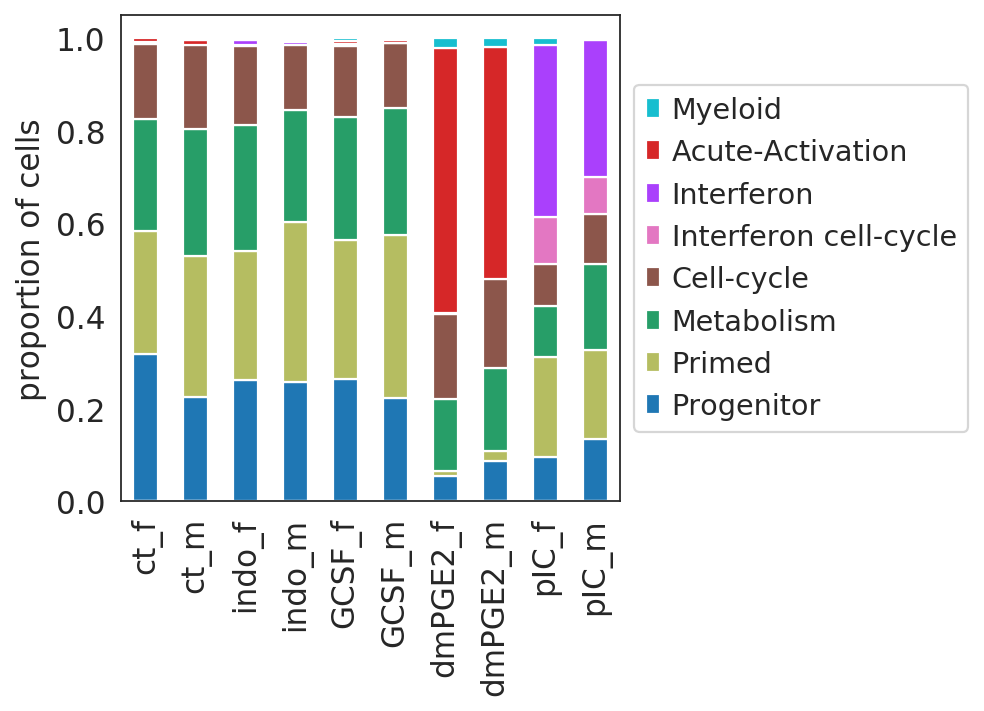

In [53]:
ax = percent_abs_v.T.loc[['ct_f', 'ct_m', 'indo_f', 'indo_m', 'GCSF_f', 'GCSF_m',  
        'dmPGE2_f', 'dmPGE2_m', 'pIC_f','pIC_m']].plot.bar(stacked=True, color = def_color)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("proportion of cells")
#plt.grid(b=None) # turns off gridlines
plt.savefig('./figures/MPP_leiden_within_treatment_sex.pdf', bbox_inches = "tight")

In [54]:
abs_v_c = pd.pivot_table(adata.obs[adata.obs['Female']==True], values='sex_sample', index=['sample'],columns=['leiden'], aggfunc=[len])
abs_v_c = abs_v_c.fillna(0) #replaces all NaNs with 0
abs_v_c.columns = abs_v_c.columns.droplevel(0) # drops columnlevel (=len)
abs_v_c

leiden  Primed  Metabolism  Progenitor  Cell-cycle  Acute-Activation  \
sample                                                                 
ct       120.0       109.0       144.0        73.0               4.0   
indo     237.0       230.0       222.0       145.0               2.0   
GCSF     292.0       259.0       258.0       149.0               6.0   
dmPGE2    10.0       161.0        57.0       190.0             592.0   
pIC      234.0       118.0       102.0        96.0               0.0   

leiden  Interferon  Interferon cell-cycle  Myeloid  
sample                                              
ct             2.0                    0.0      0.0  
indo           9.0                    1.0      2.0  
GCSF           3.0                    1.0      6.0  
dmPGE2         1.0                    0.0     21.0  
pIC          400.0                  110.0     15.0

In [55]:
abs_v_c_norm = abs_v_c.iloc[0:5,:].div(abs_v_c.sum(axis=1), axis=0) #normalize for cell numbers
abs_v_c_norm_f = abs_v_c_norm.iloc[:,0:8].div(abs_v_c_norm.sum(axis=0), axis=1)
abs_v_c_norm_f

leiden    Primed  Metabolism  Progenitor  Cell-cycle  Acute-Activation  \
sample                                                                   
ct      0.247626    0.230972    0.320063    0.212819          0.014974   
indo    0.260679    0.259779    0.263008    0.225319          0.003991   
GCSF    0.279626    0.254691    0.266117    0.201582          0.010423   
dmPGE2  0.009038    0.149423    0.055489    0.242605          0.970613   
pIC     0.203030    0.105135    0.095324    0.117676          0.000000   

leiden  Interferon  Interferon cell-cycle   Myeloid  
sample                                               
ct        0.011311               0.000000  0.000000  
indo      0.027131               0.011281  0.055078  
GCSF      0.007874               0.009822  0.143859  
dmPGE2    0.002477               0.000000  0.475207  
pIC       0.951206               0.978897  0.325856

In [56]:
abs_v_c = pd.pivot_table(adata.obs[adata.obs['Female']==False], values='sex_sample', index=['sample'],columns=['leiden'], aggfunc=[len])
abs_v_c = abs_v_c.fillna(0) #replaces all NaNs with 0
abs_v_c.columns = abs_v_c.columns.droplevel(0) # drops columnlevel (=len)
abs_v_c

leiden  Primed  Metabolism  Progenitor  Cell-cycle  Acute-Activation  \
sample                                                                 
ct       126.0       114.0        93.0        75.0               4.0   
indo     222.0       155.0       166.0        91.0               3.0   
GCSF     257.0       199.0       162.0       102.0               4.0   
dmPGE2    21.0       173.0        83.0       183.0             481.0   
pIC      205.0       197.0       144.0       115.0               0.0   

leiden  Interferon  Interferon cell-cycle  Myeloid  
sample                                              
ct             0.0                    0.0      2.0  
indo           4.0                    0.0      2.0  
GCSF           1.0                    0.0      3.0  
dmPGE2         0.0                    0.0     19.0  
pIC          313.0                   86.0      5.0

In [57]:
abs_v_c_norm = abs_v_c.iloc[0:5,:].div(abs_v_c.sum(axis=1), axis=0) #normalize for cell numbers
abs_v_c_norm_m = abs_v_c_norm.iloc[:,0:8].div(abs_v_c_norm.sum(axis=0), axis=1)
abs_v_c_norm_m

leiden    Primed  Metabolism  Progenitor  Cell-cycle  Acute-Activation  \
sample                                                                   
ct      0.250083    0.238418    0.242328    0.237929          0.018550   
indo    0.283697    0.208716    0.278495    0.185874          0.008957   
GCSF    0.290078    0.236677    0.240051    0.184016          0.010549   
dmPGE2  0.017975    0.156030    0.093267    0.250361          0.961944   
pIC     0.158168    0.160159    0.145859    0.141819          0.000000   

leiden  Interferon  Interferon cell-cycle   Myeloid  
sample                                               
ct        0.000000                    0.0  0.132177  
indo      0.020634                    0.0  0.085103  
GCSF      0.004556                    0.0  0.112750  
dmPGE2    0.000000                    0.0  0.541515  
pIC       0.974810                    1.0  0.128454

In [58]:
abs_v_c_norm = pd.merge(abs_v_c_norm_m, abs_v_c_norm_f, left_index=True, right_index=True, how='inner', suffixes=('_m', '_f'))
abs_v_c_norm = abs_v_c_norm.fillna(0) #replaces all NaNs with 0
abs_v_c_norm

leiden  Primed_m  Metabolism_m  Progenitor_m  Cell-cycle_m  \
sample                                                       
ct      0.250083      0.238418      0.242328      0.237929   
indo    0.283697      0.208716      0.278495      0.185874   
GCSF    0.290078      0.236677      0.240051      0.184016   
dmPGE2  0.017975      0.156030      0.093267      0.250361   
pIC     0.158168      0.160159      0.145859      0.141819   

leiden  Acute-Activation_m  Interferon_m  Interferon cell-cycle_m  Myeloid_m  \
sample                                                                         
ct                0.018550      0.000000                      0.0   0.132177   
indo              0.008957      0.020634                      0.0   0.085103   
GCSF              0.010549      0.004556                      0.0   0.112750   
dmPGE2            0.961944      0.000000                      0.0   0.541515   
pIC               0.000000      0.974810                      1.0   0.128454   

leiden  Primed_f  Metabolism_f  Progenitor_f  Cell-cycle_f  \
sample                                                       
ct      0.247626      0.230972      0.320063      0.212819   
indo    0.260679      0.259779      0.263008      0.225319   
GCSF    0.279626      0.254691      0.266117      0.201582   
dmPGE2  0.009038      0.149423      0.055489      0.242605   
pIC     0.203030      0.105135      0.095324      0.117676   

leiden  Acute-Activation_f  Interferon_f  Interferon cell-cycle_f  Myeloid_f  
sample                                                                        
ct                0.014974      0.011311                 0.000000   0.000000  
indo              0.003991      0.027131                 0.011281   0.055078  
GCSF              0.010423      0.007874                 0.009822   0.143859  
dmPGE2            0.970613      0.002477                 0.000000   0.475207  
pIC               0.000000      0.951206                 0.978897   0.325856

In [59]:
# define some colors to identify samples
#abs_v_c_norm = abs_v_c_norm[['Progenitor', 'Primed', 'Metabolism', 'Cell-cycle', 
                                     #  'Interferon cell-cycle', 'Interferon', 'Acute-Activation','Myeloid']]

def_color = ['#A6ACAF', '#2E86C1', '#28B463', '#EC7063', '#884EA0' ]


#https://htmlcolorcodes.com/color-chart/

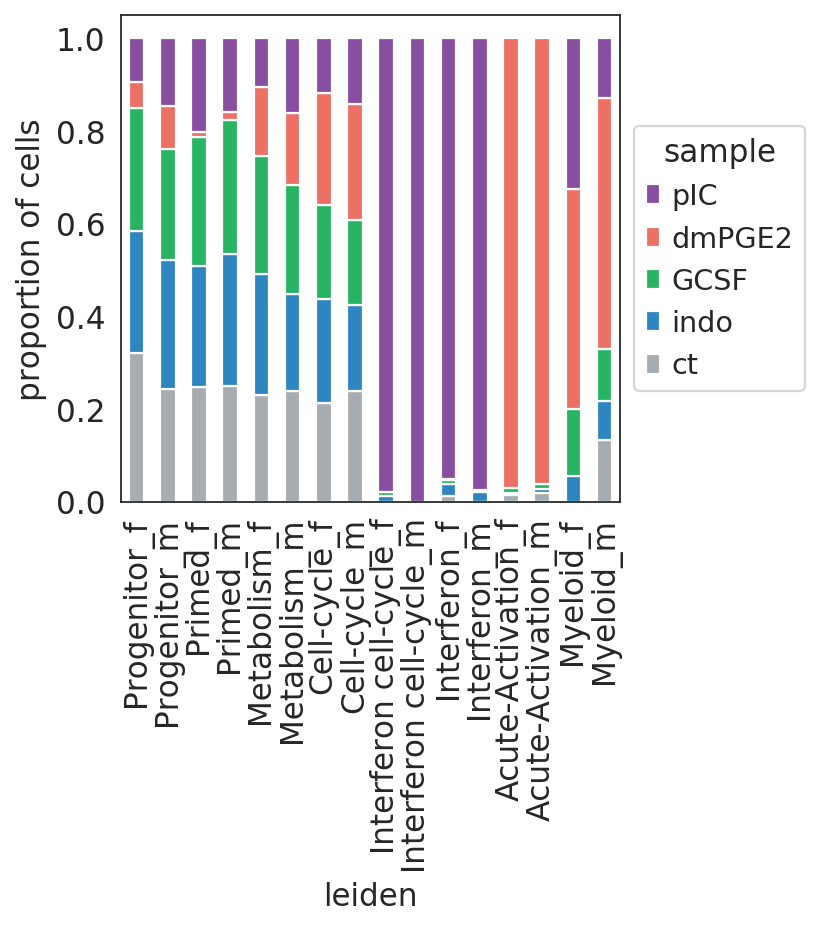

In [60]:
ax = abs_v_c_norm.loc[['ct', 'indo', 'GCSF', 'dmPGE2', 'pIC']].T.loc[['Progenitor_f','Progenitor_m','Primed_f', 'Primed_m','Metabolism_f',
                                                                      'Metabolism_m', 'Cell-cycle_f','Cell-cycle_m','Interferon cell-cycle_f',
                                                                       'Interferon cell-cycle_m',  'Interferon_f', 'Interferon_m', 'Acute-Activation_f',
                                                                        'Acute-Activation_m','Myeloid_f', 'Myeloid_m'
                                                                          ]].plot.bar(stacked=True, color = def_color)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='sample', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("proportion of cells")
#plt.grid(b=None) # turns off gridlines
plt.savefig('./figures/MPP_treatment_within_leiden_sex.pdf', bbox_inches = "tight")

### opposite directionality indo

In [61]:
adata = None
adata = sc.read('./sc_objects/LT_preprocessed.h5ad')

In [62]:
treatment = 'indo'
cell_type = 'LT'

inpath_female = './write/MAST_' + treatment + '_' + cell_type + '_leiden_female.csv'
inpath_male = './write/MAST_' + treatment + '_' + cell_type + '_leiden_male.csv'

df_f = pd.read_csv(inpath_female)
df_m = pd.read_csv(inpath_male)

df_f = df_f.set_index('primerid')
df_m = df_m.set_index('primerid')

merge_df = pd.merge(df_f, df_m, left_index=True, right_index=True, how='inner', suffixes=('_female', '_male'))
merge_df = merge_df[(pd.notna(merge_df["coef_female"])) & (pd.notna(merge_df["coef_male"]))]

merge_df['ratio'] = merge_df["coef_male"] / merge_df["coef_female"]

In [63]:
np.log(1.2)

0.1823215567939546

In [64]:
merge_df[merge_df['ratio']<0].sort_values(by=['coef_female'])

Unnamed: 0_female  Pr(>Chisq)_female  coef_female    FDR_female  \
primerid                                                                     
Tsc22d3                   31       9.442126e-23    -0.174758  2.874670e-20   
Serpina3g                 53       1.477251e-14    -0.164701  2.653082e-12   
Klf9                     101       4.759760e-10    -0.111539  4.447783e-08   
Rgs1                     391       2.202707e-04    -0.111520  5.316917e-03   
Dynll1                   114       1.632166e-09    -0.105132  1.351261e-07   
Pik3ip1                  149       1.069145e-07    -0.096064  6.772205e-06   
Ccnt1                    129       7.963092e-09    -0.093381  5.826020e-07   
Coro2a                   116       2.095092e-09    -0.088025  1.696900e-07   
Dnaja1                   112       1.351819e-09    -0.084391  1.139149e-07   
Tsc22d1                  324       6.538246e-05    -0.084281  1.904567e-03   
Tmem158                   54       1.828835e-14    -0.084107  3.196397e-12   
Per1                      62       3.586928e-13    -0.079173  5.488862e-11   
Serinc3                  125       4.729179e-09    -0.077441  3.570719e-07   
Myb                      304       4.002739e-05    -0.075778  1.242692e-03   
Yrdc                     300       3.826611e-05    -0.063775  1.205471e-03   
Coro1a                   243       1.065147e-05    -0.062728  4.146777e-04   
Rbm39                    203       3.014326e-06    -0.056692  1.397984e-04   
Banp                     383       1.950678e-04    -0.032276  4.806919e-03   
Hnrnpd                   403       2.572671e-04     0.053000  6.025029e-03   
Nr4a2                    157       2.475736e-07     0.056770  1.488280e-05   
Btg2                     343       9.719772e-05     0.068690  2.674496e-03   
Bst2                     181       1.466174e-06     0.073221  7.645166e-05   
Kit                      179       1.211080e-06     0.078187  6.385569e-05   
Fos                       24       1.791392e-27     0.298480  7.044650e-25   

           Unnamed: 0_male  Pr(>Chisq)_male  coef_male      FDR_male     ratio  
primerid                                                                        
Tsc22d3                 42     7.372105e-17   0.157702  1.640469e-14 -0.902402  
Serpina3g              231     2.077448e-05   0.094095  8.405122e-04 -0.571307  
Klf9                   189     5.963838e-06   0.080607  2.949102e-04 -0.722682  
Rgs1                   394     3.416659e-04   0.106305  8.124308e-03 -0.953241  
Dynll1                  28     2.664917e-23   0.168567  8.895112e-21 -1.603378  
Pik3ip1                349     2.151308e-04   0.067847  5.761067e-03 -0.706262  
Ccnt1                  156     1.507107e-06   0.044048  9.029119e-05 -0.471702  
Coro2a                  81     9.781041e-10   0.083853  1.114800e-07 -0.952594  
Dnaja1                  47     9.870848e-16   0.128082  1.962829e-13 -1.517725  
Tsc22d1                 99     8.764891e-09   0.110864  8.274411e-07 -1.315407  
Tmem158                 94     4.952423e-09   0.058188  4.923972e-07 -0.691835  
Per1                   185     5.450575e-06   0.040742  2.753571e-04 -0.514600  
Serinc3                142     3.698572e-07   0.072609  2.434286e-05 -0.937613  
Myb                    101     1.126628e-08   0.087955  1.042521e-06 -1.160700  
Yrdc                   111     3.748900e-08   0.080056  3.156506e-06 -1.255289  
Coro1a                 292     8.500021e-05   0.059990  2.720589e-03 -0.956340  
Rbm39                   68     1.506977e-11   0.085679  2.071206e-09 -1.511306  
Banp                   117     6.356091e-08   0.049517  5.077267e-06 -1.534153  
Hnrnpd                  98     8.515040e-09  -0.095298  8.120567e-07 -1.798089  
Nr4a2                  367     2.664558e-04  -0.081918  6.785548e-03 -1.442971  
Btg2                   196     7.902733e-06  -0.082924  3.768313e-04 -1.207217  
Bst2                   303     1.019207e-04  -0.071530  3.143731e-03 -0.976899  
Kit                    338     1.80767

In [65]:
genes = merge_df[merge_df['ratio']<0].sort_values(by=['coef_female']).index.tolist()
dic = {'genes': genes}

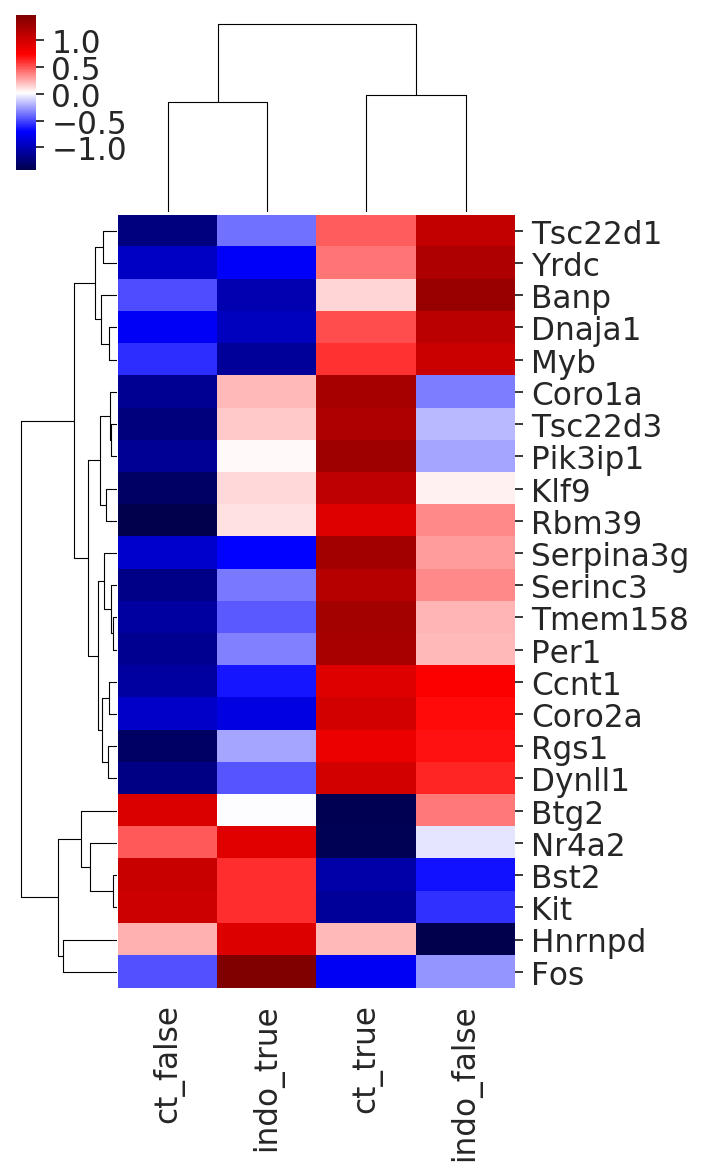

In [66]:
avg = average_expression(adata, dic, gene_symbol_key=None, partition_key='sex_sample')
sns_plot = sns.clustermap(avg[['ct_false','ct_true','indo_false', 'indo_true'
                                ]],
                          col_cluster=True,
                          figsize= (4, 8),
                          z_score=0,
                          method= 'average',
                          metric = 'euclidean',
                          cmap = 'seismic',
                          xticklabels=True,
                          yticklabels=True
                         )

In [67]:
genes_df = pd.DataFrame(genes)
genes_df['index1'] = genes_df.index
neworder_df = pd.DataFrame(sns_plot.dendrogram_row.reordered_ind, columns = ['index1'])
orderedbycluster = pd.merge(neworder_df, genes_df, how='inner', on='index1')
orderedbycluster = orderedbycluster[0].tolist()

In [68]:
# Order of the lineage
lin = ('ct_true', 'indo_true', 'ct_false', 'indo_false', 'GCSF_true', 'GCSF_false', 'dmPGE2_true', 'dmPGE2_false', 'pIC_true', 'pIC_false')


# Reordering leiden labels using Categorical data type
adata.obs['sex_sample'] = adata.obs['sex_sample'].cat.reorder_categories((lin), ordered=True)

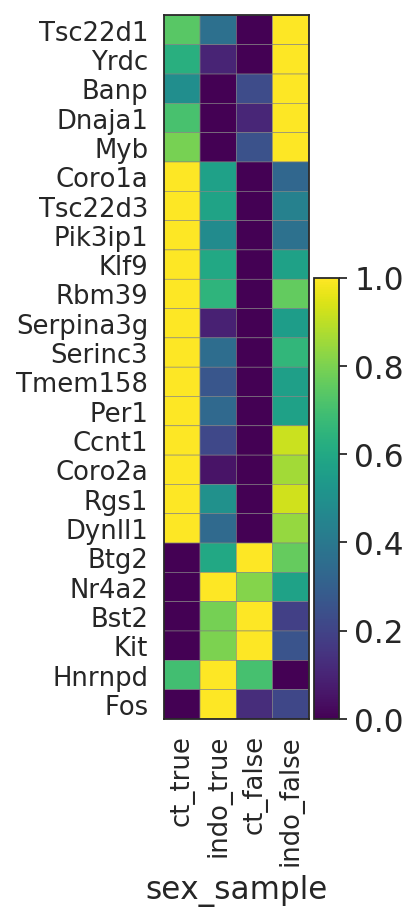

GridSpec(2, 3, height_ratios=[0, 4.800000000000001], width_ratios=[1.2, 0, 0.2])

In [69]:
sc.pl.matrixplot(adata[(adata.obs['sex_sample']=='ct_false') | (adata.obs['sex_sample']=='ct_true') |
                    (adata.obs['sex_sample']=='indo_false') | (adata.obs['sex_sample']=='indo_true')
                      ],
                      orderedbycluster, groupby='sex_sample', cmap='viridis', swap_axes=True, 
                     save='_indo_sex_Dimorphism.pdf', standard_scale = 'var')

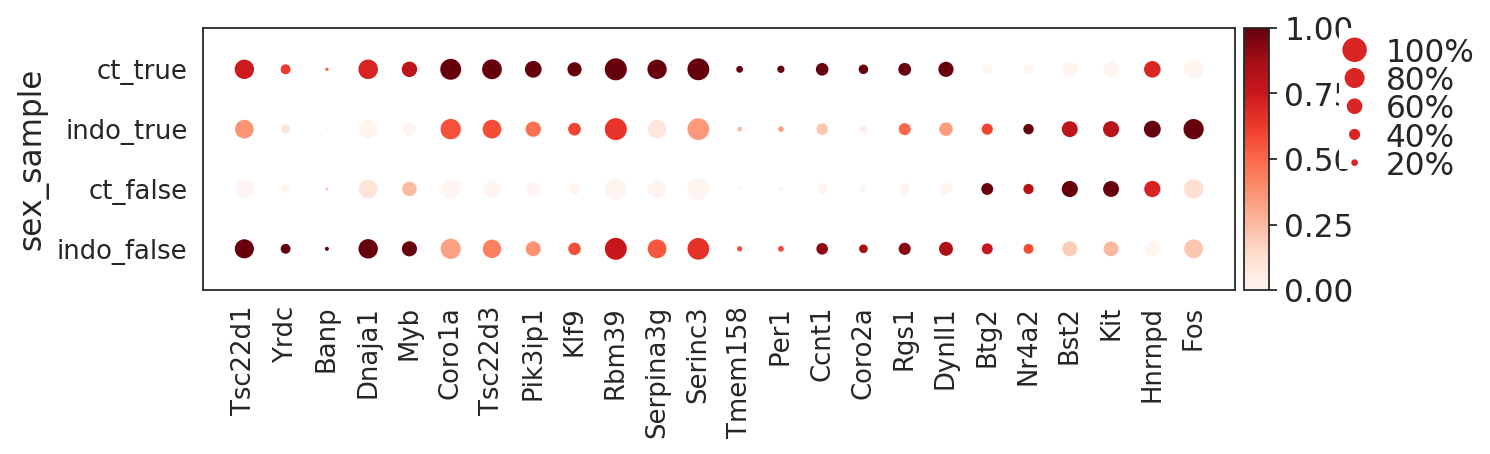

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[8.399999999999999, 0, 0.2, 0.5, 0.25])

In [70]:
sc.pl.dotplot(adata[(adata.obs['sex_sample']=='ct_false') | (adata.obs['sex_sample']=='ct_true') |
                    (adata.obs['sex_sample']=='indo_false') | (adata.obs['sex_sample']=='indo_true')
                      ],
                      orderedbycluster, groupby='sex_sample', standard_scale = 'var'
                     )

In [71]:
LT_new[LT_new.index.isin(genes)]

Unnamed: 0    Pr(>Chisq)      coef           FDR
primerid                                                   
Tsc22d3             6  3.138690e-90  0.385584  4.831490e-87
Klf9               15  1.587367e-28  0.177368  9.773946e-26
Coro1a             18  6.259543e-26  0.166709  3.219403e-23
Pik3ip1            19  7.254688e-26  0.187270  3.526542e-23
Rbm39              20  1.414617e-25  0.134446  6.532699e-23
Tmem158            23  8.096857e-24  0.124860  3.251416e-21
Per1               27  4.694279e-21  0.079218  1.605791e-18
Dynll1             30  3.653013e-19  0.163230  1.124641e-16
Serinc3            33  3.857089e-18  0.119159  1.047767e-15
Btg2               41  5.004177e-17 -0.165967  1.127282e-14
Serpina3g          43  3.016341e-16  0.173136  6.478819e-14
Bst2               88  9.541283e-09 -0.105040  1.001401e-06
Kit               103  1.177249e-07 -0.091780  1.050638e-05
Coro2a            106  1.755564e-07  0.077032  1.529660e-05
Nr4a2             119  6.709176e-07 -0.061765  5.237868e-05
Tsc22d1           134  1.663518e-06  0.100759  1.146586e-04
Rgs1              150  5.308321e-06  0.114720  3.268510e-04
Ccnt1             158  7.947517e-06  0.064088  4.645776e-04
Dnaja1            184  2.887881e-05  0.077987  1.449591e-03

In [72]:
len(genes)

24

In [73]:
len(LT_new[LT_new.index.isin(genes)])

19

In [74]:
gene_name_annotation_long(genes)

incoming                                  short_description
0     Tsc22d3                     TSC22 domain family, member 3 
1   Serpina3g  serine (or cysteine) peptidase inhibitor, clad...
2        Klf9                             Kruppel-like factor 9 
3        Rgs1                regulator of G-protein signaling 1 
4      Dynll1                     dynein light chain LC8-type 1 
5     Pik3ip1   phosphoinositide-3-kinase interacting protein 1 
6       Ccnt1                                         cyclin T1 
7      Coro2a                 coronin, actin binding protein 2A 
8      Dnaja1  DnaJ heat shock protein family (Hsp40) member A1 
9     Tsc22d1                     TSC22 domain family, member 1 
10    Tmem158                         transmembrane protein 158 
11       Per1                          period circadian clock 1 
12    Serinc3                             serine incorporator 3 
13        Myb                           myeloblastosis oncogene 
14       Yrdc                   yrdC domain containing (E.coli) 
15     Coro1a                 coronin, actin binding protein 1A 
16      Rbm39                      RNA binding motif protein 39 
17       Banp                   BTG3 associated nuclear protein 
18     Hnrnpd         heterogeneous nuclear ribonucleoprotein D 
19      Nr4a2   nuclear receptor subfamily 4, group A, member 2 
20       Btg2                   BTG anti-proliferation factor 2 
21       Bst2                bone marrow stromal cell antigen 2 
22        Kit       KIT proto-oncogene receptor tyrosine kinase 
23        Fos                         FBJ osteosarcoma oncogene

Btg2
https://stemcellsjournals.onlinelibrary.wiley.com/doi/full/10.1634/stemcells.2008-0327

sexual dimorphism in circadian rythm
https://www.frontiersin.org/articles/10.3389/fendo.2014.00234/full

sexual dimorphism in heart - use for methods (also found Tsc22d3)
https://www.biorxiv.org/content/10.1101/201970v1.full


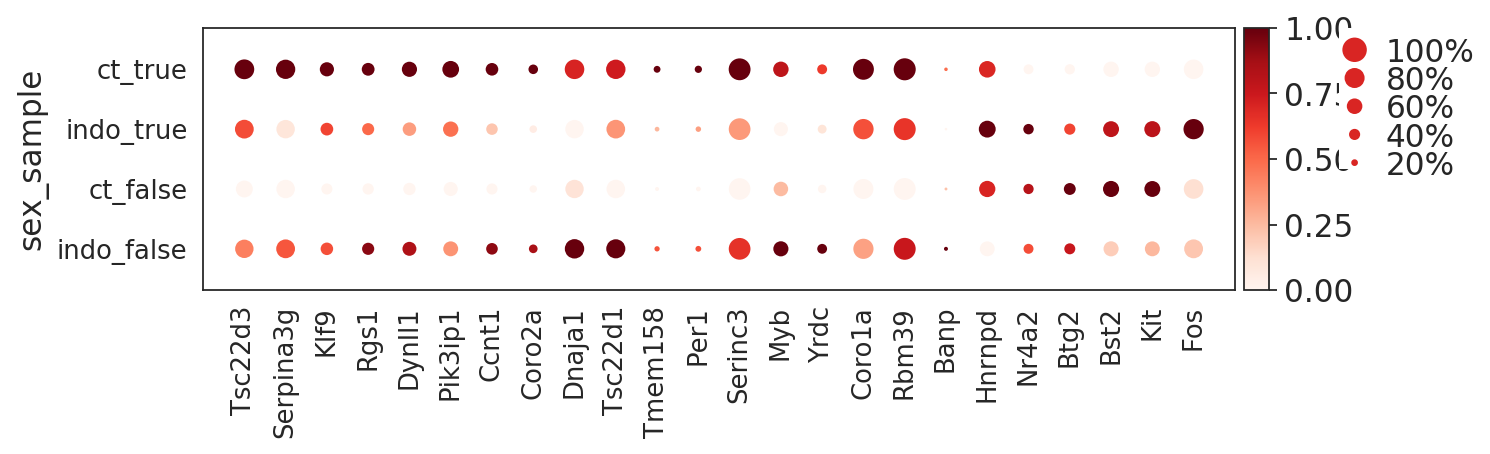

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[8.399999999999999, 0, 0.2, 0.5, 0.25])

In [75]:
sc.pl.dotplot(adata[(adata.obs['sex_sample']=='ct_false') | (adata.obs['sex_sample']=='ct_true') |
                    (adata.obs['sex_sample']=='indo_false') | (adata.obs['sex_sample']=='indo_true')
                      ],
                      genes, groupby='sex_sample', standard_scale = 'var')

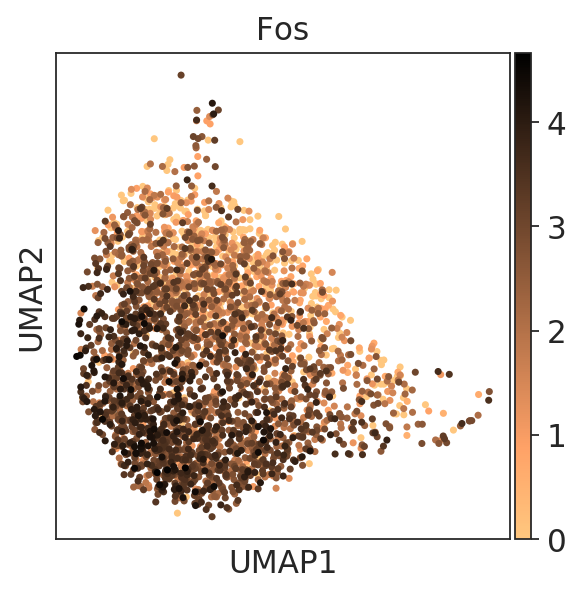

In [76]:
sc.pl.umap(adata[adata.obs['sex_sample']=='indo_false'], color = 'Fos', cmap = 'copper_r')

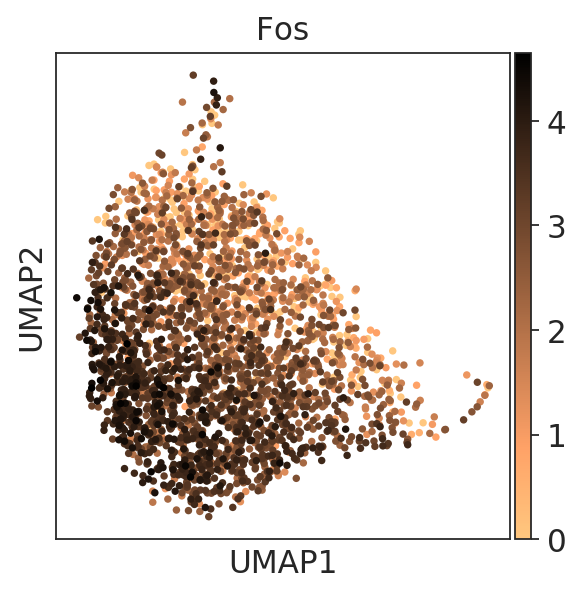

In [77]:
sc.pl.umap(adata[adata.obs['sex_sample']=='indo_true'], color = 'Fos',  cmap = 'copper_r')

In [78]:
!pip list

Package                Version            
---------------------- -------------------
alembic                1.3.0              
anndata                0.7.1              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.1              
bleach                 3.1.0              
blinker                1.4                
bokeh                  1.3.4              
cellbrowser            0.7.7              
certifi                2020.4.5.1         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
Click                  7.0                
cloudpickle            1.2.2              
conda                  4.7.12             
conda-package-handling 1.6.0              
cryptography           2.8                
cycler                 0.10.0             
Cython                 0.29.14            
cytoolz    